###ASSIGNMENT-3

MUNDRU DHARANI HARSHITHA

##TASK-1: Download the dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##TASK-2: Load the dataset

In [53]:
df=pd.read_csv('/content/penguins_size.csv')

In [54]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [55]:
df.shape

(344, 7)

First we will check the null values then do the visualization

##TASK-5: Check for missing values and deal with them

In [56]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

There are Null values in columns culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g,   sex         

In [57]:
length_median=df.culmen_length_mm.median()
length_median

44.45

In [58]:
df.culmen_length_mm = df.culmen_length_mm.fillna(length_median)

In [59]:
depth_median=df.culmen_depth_mm.median()
depth_median

17.3

In [60]:
df.culmen_depth_mm=df.culmen_depth_mm.fillna(depth_median)

In [61]:
flipper_median=df.flipper_length_mm.median()
flipper_median

197.0

In [62]:
df.flipper_length_mm=df.flipper_length_mm.fillna(flipper_median)

In [63]:
bmass_median=df.body_mass_g.median()
bmass_median

4050.0

In [64]:
df.body_mass_g=df.body_mass_g.fillna(bmass_median)

In [65]:
smode=df.sex.mode()
smode

0    MALE
Name: sex, dtype: object

In [66]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [67]:
df.sex=df.sex.replace('.','MALE')

In [68]:
df.sex=df.sex.fillna('MALE')

In [69]:
df.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [70]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Hence all the null values are replaced

##TASK-3: Perform below visualizations
1. Univariate
2. Bivariate
3. Multivariate

##Univariate

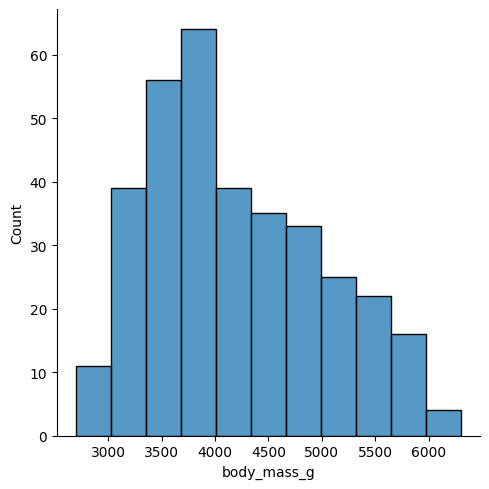

In [71]:
sns.displot(df.body_mass_g)
plt.show()

<ipython-input-72-c7e34e176bfc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_depth_mm)


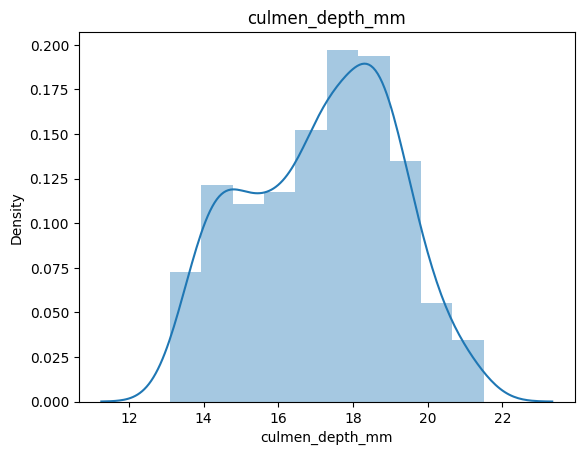

In [72]:
sns.distplot(df.culmen_depth_mm)
plt.title('culmen_depth_mm')
plt.show()

<Axes: >

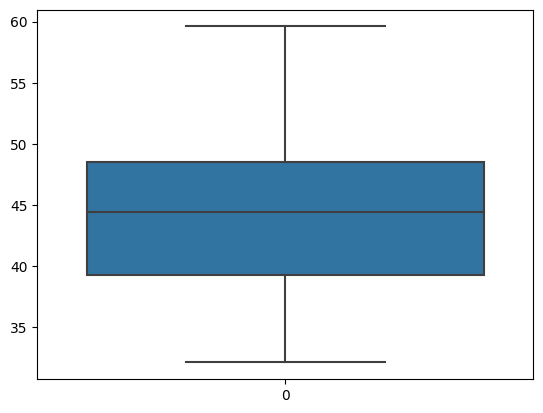

In [73]:
sns.boxplot(df.culmen_length_mm)

In [74]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

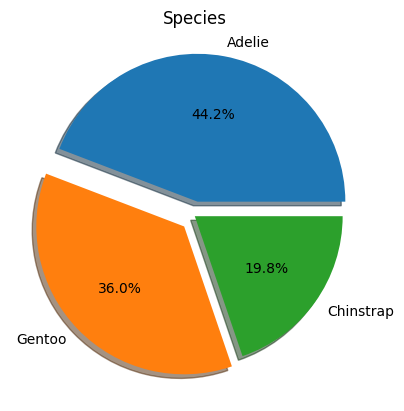

In [75]:
plt.pie(df.species.value_counts(),[0.1,0.1,0],autopct='%1.1f%%',shadow=True,labels=['Adelie','Gentoo','Chinstrap'])
plt.title('Species')
plt.show()

##Bivariate

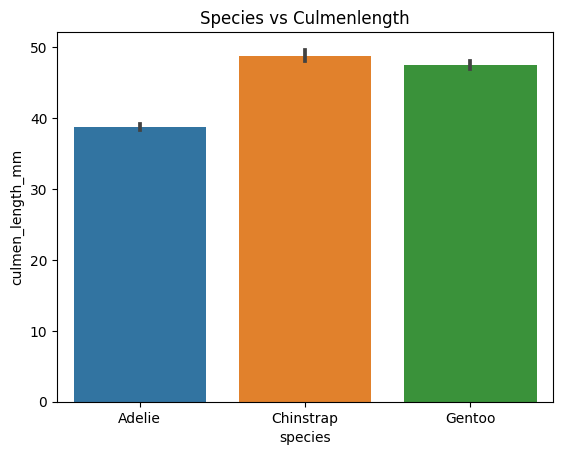

In [76]:
sns.barplot(x=df.species,y=df.culmen_length_mm)
plt.title('Species vs Culmenlength')
plt.show()

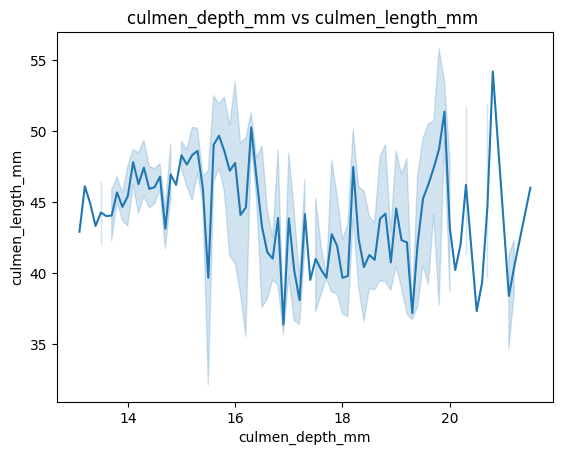

In [77]:
sns.lineplot(x=df.culmen_depth_mm,y=df.culmen_length_mm)
plt.title('culmen_depth_mm vs culmen_length_mm ')
plt.show()

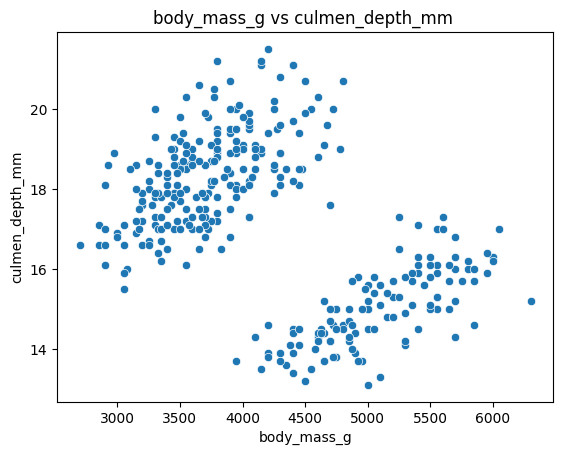

In [78]:
sns.scatterplot(x=df.body_mass_g,y=df.culmen_depth_mm)
plt.title('body_mass_g vs culmen_depth_mm ')
plt.show()

##Multivariate

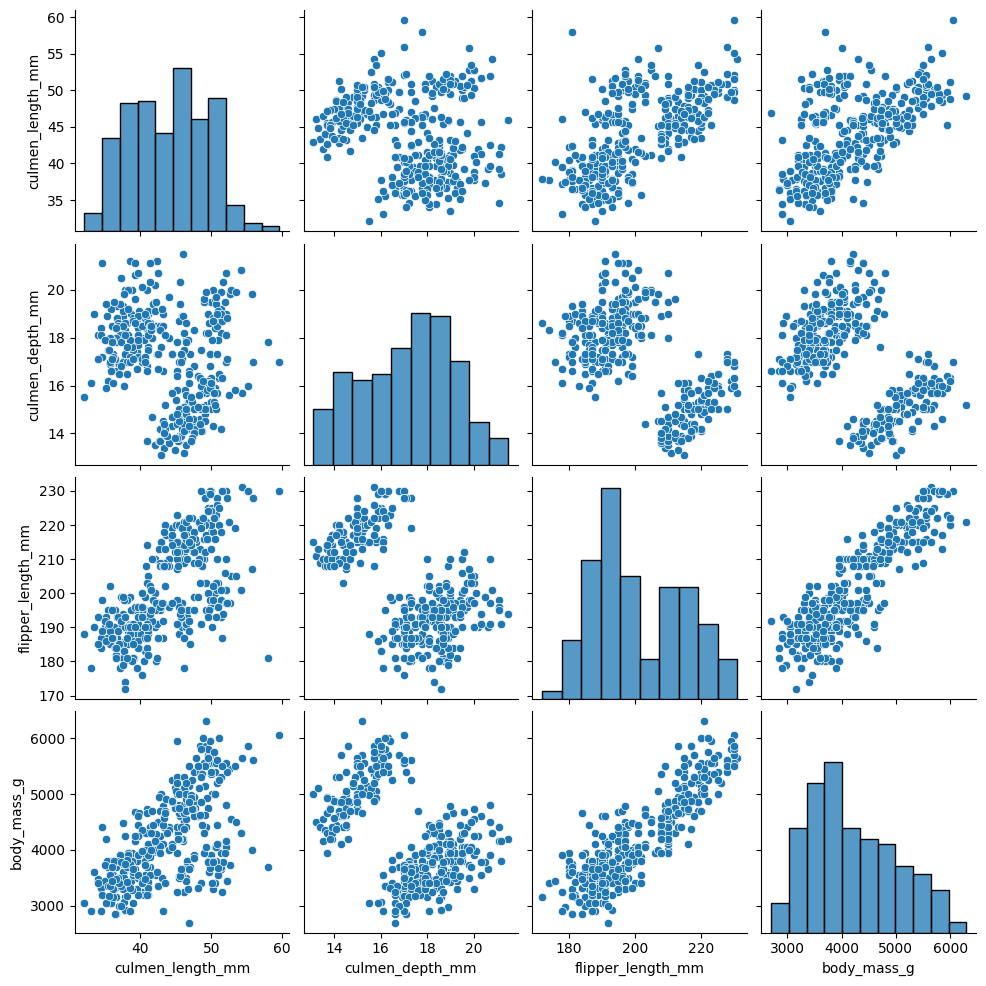

In [79]:
sns.pairplot(df)

<ipython-input-80-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

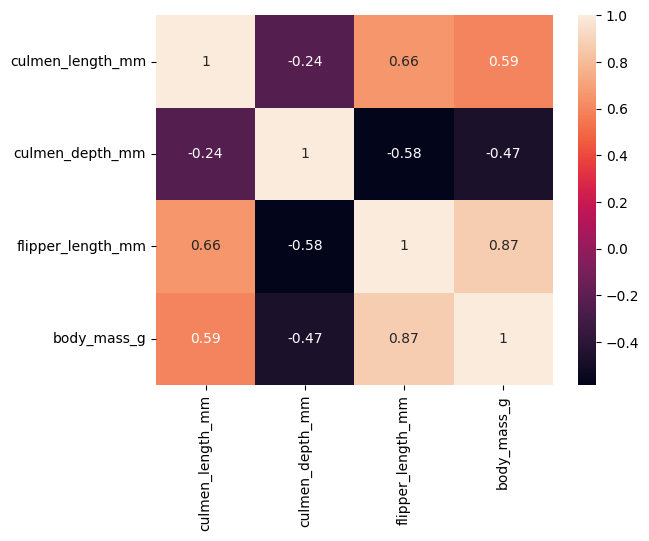

In [80]:
sns.heatmap(df.corr(),annot=True)

##TASK-4: Perform descriptive statistics

In [81]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##TASK-6: Find outliers and replace outliers

<Axes: >

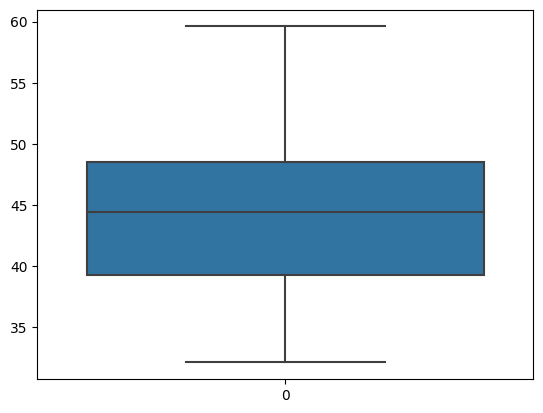

In [82]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

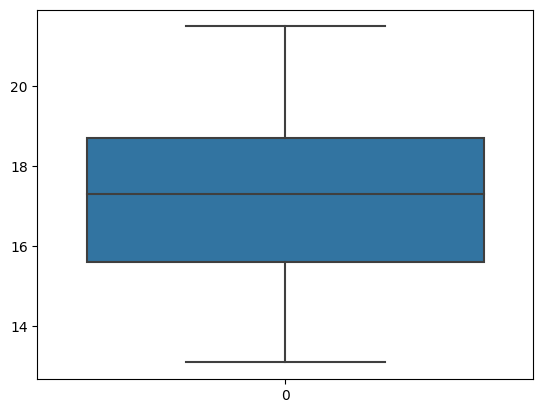

In [83]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

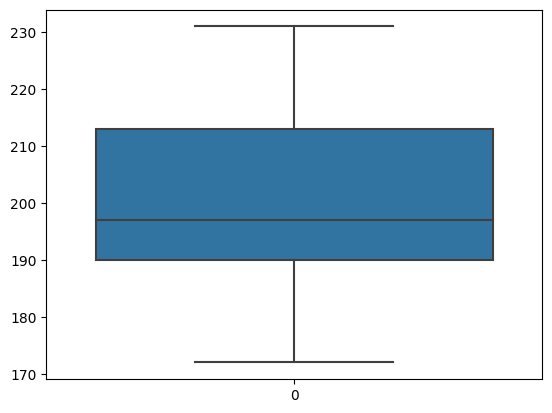

In [84]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

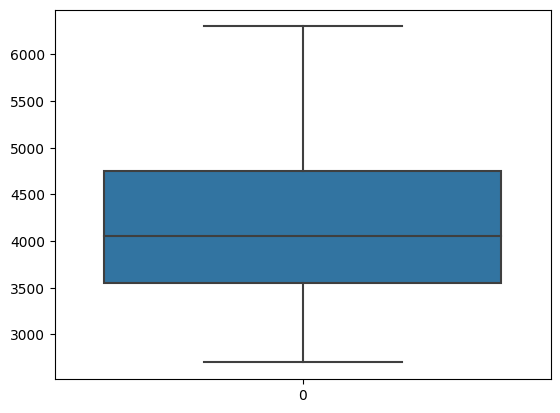

In [85]:
sns.boxplot(df.body_mass_g)

####From the boxplot we can say that there is no data above or below the upper limit and lower limit respectively so there are no outliers present.

There are no outliers present in the data

##TASK-8: Check for categorical columns and perform encoding

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [87]:
df.island=le.fit_transform(df.island)
df.sex=le.fit_transform(df.sex)
df.species=le.fit_transform(df.species)

In [88]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


###TASK-7: Check the correlation of independent variables with the target

HERE TARGER FEATURE IS PENGUIN SPECIES AND OTHER ALL ARE INDEPENDENT FEATURES

<Axes: >

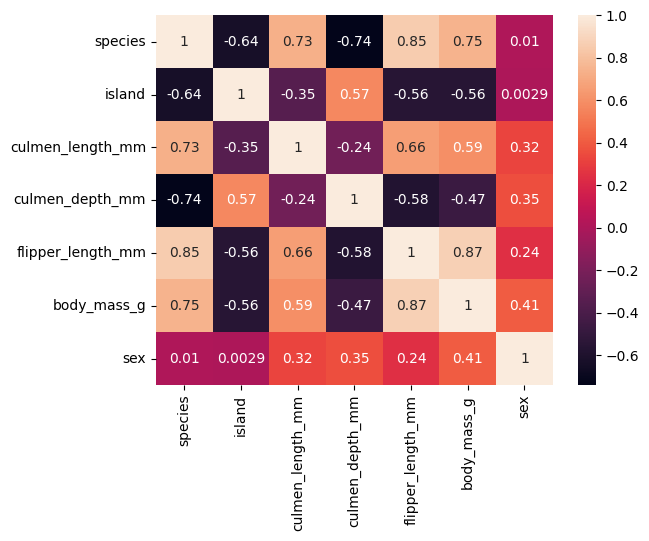

In [89]:
sns.heatmap(df.corr(),annot=True)

In [90]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

##TASK-9: Split the data into dependent and independent variables.(X AND Y SPLIT)


In [91]:
x=df.drop(columns=['species'])
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0
...,...,...,...,...,...,...
339,0,44.45,17.3,197.0,4050.0,1
340,0,46.80,14.3,215.0,4850.0,0
341,0,50.40,15.7,222.0,5750.0,1
342,0,45.20,14.8,212.0,5200.0,0


In [92]:
y=df.species
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

##Task-10: Scaling the data (independent variables)

In [93]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [94]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...
339,0.0,0.449091,0.500000,0.423729,0.375000,1.0
340,0.0,0.534545,0.142857,0.728814,0.597222,0.0
341,0.0,0.665455,0.309524,0.847458,0.847222,1.0
342,0.0,0.476364,0.202381,0.677966,0.694444,0.0


##Task-11: Split the data into training and testing

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=10)

##Task-12: Check the training and testing data shape.

In [96]:
x_train.shape

(240, 6)

In [97]:
x_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
258,0.0,0.432727,0.059524,0.610169,0.458333,0.0
332,0.0,0.414545,0.250000,0.694915,0.541667,0.0
121,1.0,0.203636,0.797619,0.440678,0.222222,1.0
61,0.0,0.334545,0.952381,0.389831,0.472222,1.0
70,1.0,0.050909,0.702381,0.305085,0.250000,0.0
...,...,...,...,...,...,...
123,1.0,0.338182,0.642857,0.508475,0.326389,1.0
320,0.0,0.596364,0.226190,0.796610,0.597222,0.0
15,1.0,0.163636,0.559524,0.220339,0.277778,0.0
125,1.0,0.309091,0.702381,0.457627,0.361111,1.0


In [98]:
y_train.shape

(240,)

In [99]:
x_test.shape

(104, 6)

In [100]:
x_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
229,0.0,0.534545,0.273810,0.728814,0.680556,1.0
80,1.0,0.090909,0.488095,0.288136,0.138889,0.0
327,0.0,0.774545,0.321429,0.796610,0.777778,1.0
6,1.0,0.247273,0.559524,0.152542,0.256944,0.0
309,0.0,0.727273,0.464286,0.983051,0.791667,1.0
...,...,...,...,...,...,...
211,0.5,0.490909,0.750000,0.372881,0.229167,0.0
311,0.0,0.730909,0.476190,0.949153,0.750000,1.0
19,1.0,0.505455,1.000000,0.372881,0.416667,1.0
270,0.0,0.527273,0.130952,0.644068,0.597222,0.0


In [101]:
y_test.shape

(104,)

In [102]:
y_test

229    2
80     0
327    2
6      0
309    2
      ..
211    1
311    2
19     0
270    2
194    1
Name: species, Length: 104, dtype: int64

##THANK YOU